# Heart disease classification

##  USING SUPPORT VECTOR MACHINE (SVM)

### IMPORTING THE LIBRARIES

In [1]:
#importing the libraries.....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IMPORTING THE DATASET 


In [2]:
#Reading the dataset 
ds=pd.read_csv('heart.csv')
print(ds)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#splitting the dataset into independent and dependent variables
X = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values
print(X)
print(y)


[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


### FEATURE SCALING 

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


### SPLITTING THE DATASET INTO TRAINING SET AND TEST SET

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5)

### CREATING THE MODEL

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear' , random_state = 1)
clf = classifier.fit(X_train , y_train)

In [9]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


In [10]:
#confusion matrix is used to check how many datapoints are predicted exactly 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(round(accuracy_score(y_test,y_pred) , 2))


[[33  5]
 [ 3 35]]
0.89


### CONFUSION MATRIX

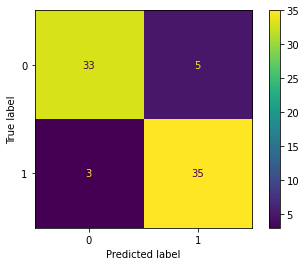

In [11]:
from sklearn.metrics import plot_confusion_matrix
a = plot_confusion_matrix(clf , X_test , y_test)
plt.show()


## Using K-Nearest Neighbor Classifier (K-NN)

### IMPORTING DATASET

In [12]:
X = ds.iloc[:,:-1].values
y = ds.iloc[:,13].values

### Splitting data

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

### Normalize the data 

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Accuracy based on K values

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


### Confusion Matrix

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  8],
       [ 3, 40]], dtype=int64)

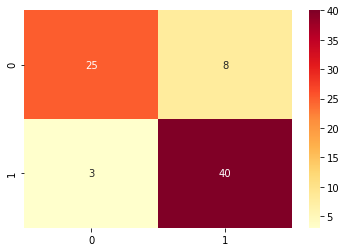

In [17]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="YlOrRd")
plt.show()

## Using SVM WITH PCA

### Extracting x and y

In [18]:
X=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

### STANDARDIZING 'X'

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


### Splitting the dataset into train and test data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

### Applying the PCA

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.20826798 0.11737551]


### Training the svm model on training set

In [22]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

### Predicting the Test Resuts

In [23]:
from sklearn import metrics
y_pred=classifier.predict(X_test)
print(y_pred)

[1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]


### Calculating the Accuracy

In [24]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.85


### Creating the Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[20  5]
 [ 4 32]]


### Plotting the Confusion Matrix

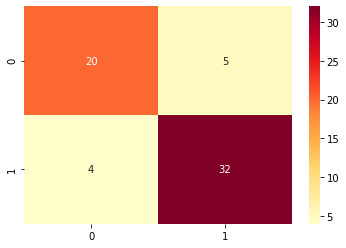

In [26]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="YlOrRd")
plt.show()

## Using KNN with PCA

### Extracting x and y

In [27]:
X=ds.iloc[:,:-1].values
y=ds.iloc[:,13].values

### STANDARDIZING 'X'

In [28]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(X)

## SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

### APPLYING 'PCA'

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.20948567 0.12122518]


### TRAINING THE K-NN MODEL ON TRAINING SET

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clas=KNeighborsClassifier(n_neighbors =6,metric='minkowski',p=2)
clas.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

### PREDICTING THE TEST RESULTS

In [32]:
y_pred=clas.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]]


### CONFUSION MATRIX AND ACCURACY

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[22  1]
 [ 3 20]]


0.9130434782608695

### PLOT OF CONFUSION MATRIX

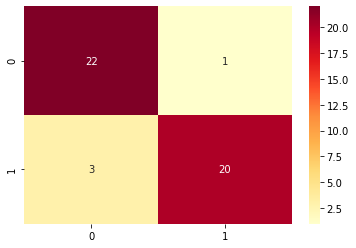

In [34]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="YlOrRd")
plt.show()

## BAR PLOT FOR COUNT OF PEOPLE DISEASED AND NOT DISEASED

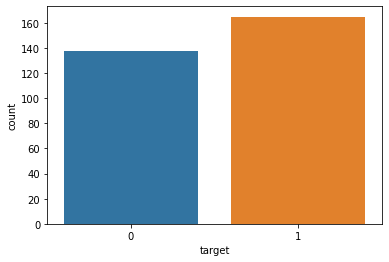

In [35]:
import seaborn as sns
sns.countplot(x = 'target' , data = ds)
plt.show()

## SCATTER PLOT BETWEEN AGE AND MAX. HEART RATE

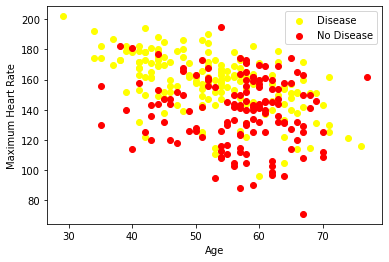

In [36]:
plt.scatter(x=ds.age[ds.target==1], y=ds.thalach[(ds.target==1)], c="yellow")
plt.scatter(x=ds.age[ds.target==0], y=ds.thalach[(ds.target==0)], c = 'red')
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## COUNT OF MALE AND FEMALE

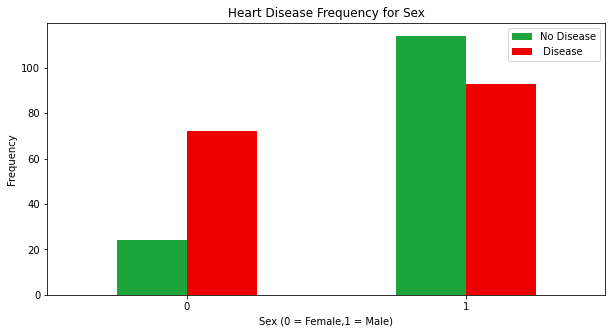

In [37]:
pd.crosstab(ds.sex,ds.target).plot(kind="bar",figsize=(10,5),color=['#1CA53B','#EE0000'])
plt.title('Heart Disease Frequency for Sex') 
plt.xlabel('Sex (0 = Female,1 = Male)')
plt.xticks(rotation=0 ) 
plt.legend(["No Disease", " Disease "]) 
plt.ylabel("Frequency") 
plt.show()